In [181]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
expected_values = {
    "Best accuracy obtained": "0.736576",
    "averageInteractionsPerCrossing": "41.3766",
    "p_Rhad": "0.05993",
    "p_Rhad1": "0.0377865",
    "p_TRTTrackOccupancy": "0.468433",
    "p_topoetcone40": "4.96027",
    "p_eTileGap3Cluster": "0.391874",
    "p_phiModCalo": "1.51578e-05",
    "p_etaModCalo": "0.0125259",
}

In [182]:
versions = [0,1 ,2]
workers = [2,3,4,5,6,7,8,9]

times = []
for version in versions:
    for worker in workers:
        filepath = f"/home/francesco/Documenti/Master/Blok 3/HPPC/week3/data/task_farm.v{version}.{worker}.workers.txt"
        with open(filepath, 'r') as file:
            for line in file:
                if 'Elapsed time' in line:
                    elapsed_time = line.split(': ')[1].strip()[:-1]
                    times.append([version, worker, elapsed_time])
                    break

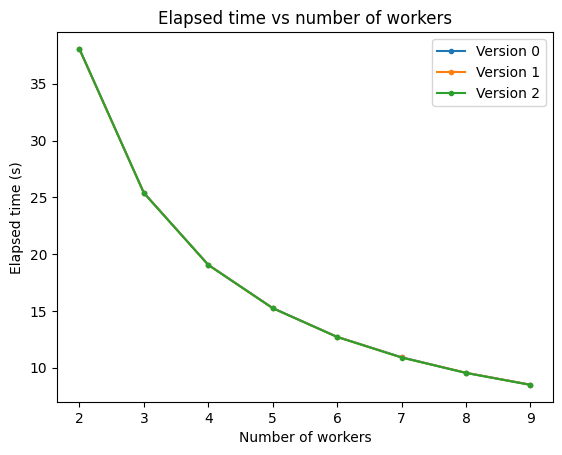

In [183]:
df = pd.DataFrame(times, columns=['version', 'workers', 'elapsed_time'])
df['elapsed_time'] = df['elapsed_time'].astype(float)
for version in df['version'].unique():
    df_version = df[df['version'] == version]
    plt.plot(df_version['workers'], df_version['elapsed_time'], marker='o', markersize = 3,  label=f'Version {version}')

plt.xlabel('Number of workers')
plt.ylabel('Elapsed time (s)')
plt.title('Elapsed time vs number of workers')
plt.legend()
plt.show()

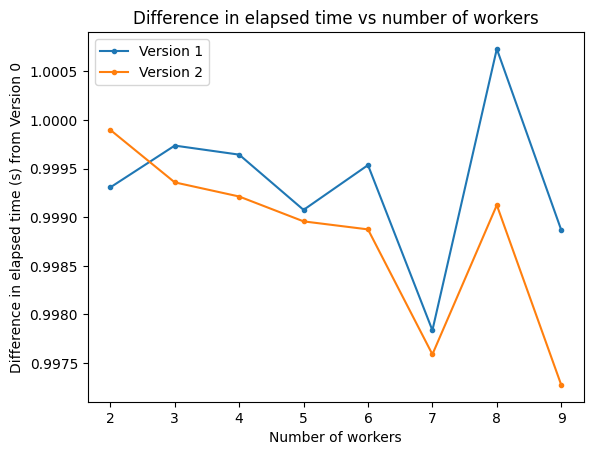

In [188]:
df_version_0 = df[df['version'] == 0].set_index('workers')['elapsed_time']
df['diff_from_v0'] = df.apply(lambda row: row['elapsed_time'] / df_version_0[row['workers']], axis=1)

for version in df['version'].unique():
    if version != 0:
        df_version = df[df['version'] == version]
        plt.plot(df_version['workers'], df_version['diff_from_v0'], marker='o', markersize=3, label=f'Version {version}')

plt.xlabel('Number of workers')
plt.ylabel('Difference in elapsed time (s) from Version 0')
plt.title('Difference in elapsed time vs number of workers')
plt.legend()
plt.show()

In [185]:
versions = [0,1,2, 3,4]
workers = [2, 3, 4, 5, 6, 7, 8, 9]

filepath = f"/home/francesco/Documenti/Master/Blok 3/HPPC/week3/data/task_farm_HEP_seq.workers.txt"
with open(filepath, "r") as file:
    for line in file:
        if "Elapsed time" in line:
            elapsed_time = line.split(": ")[1].strip()[:-1]
            seq_time = elapsed_time
            break

times = []
for version in versions:
    for worker in workers:
        filepath = f"/home/francesco/Documenti/Master/Blok 3/HPPC/week3/data/task_farm_HEP.v{version}.{worker}.workers.txt"
        with open(filepath, "r") as file:
            for line in file:
                key = line.split(":")[0].strip()
                if key in expected_values:
                    value = line.split(":")[1].strip()
                    if value != expected_values[key]:
                        print(f"{key} not as expected for version {version} and {worker} workers")
                elif key == "Elapsed time":
                    elapsed_time = line.split(": ")[1].strip()[:-1]
                    times.append([version, worker, elapsed_time])
                    break
        

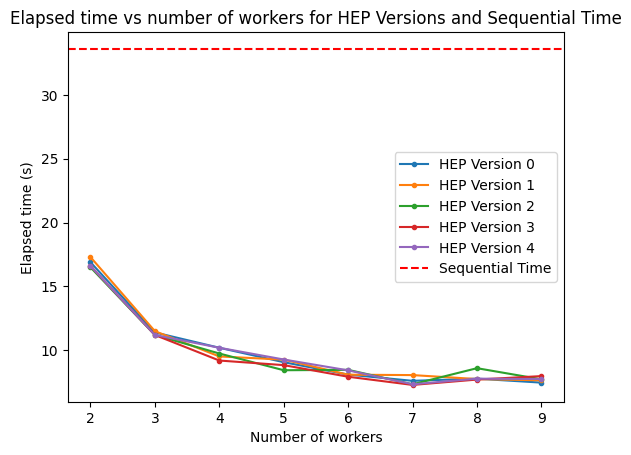

In [186]:
seq_time = float(seq_time)

df_hep = pd.DataFrame(times, columns=['version', 'workers', 'elapsed_time'])
df_hep['elapsed_time'] = df_hep['elapsed_time'].astype(float)

for version in df_hep['version'].unique():
    df_version = df_hep[df_hep['version'] == version]
    plt.plot(df_version['workers'], df_version['elapsed_time'], marker='o', markersize=3, label=f'HEP Version {version}')

plt.axhline(y=seq_time, color='r', linestyle='--', label='Sequential Time')
plt.xlabel('Number of workers')
plt.ylabel('Elapsed time (s)')
plt.title('Elapsed time vs number of workers for HEP Versions and Sequential Time')
plt.legend()
plt.show()

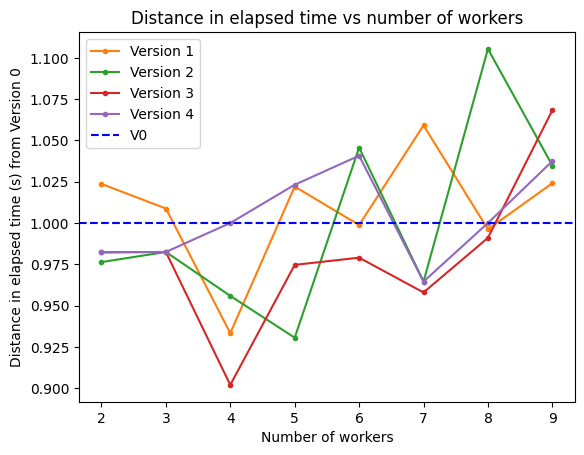

In [187]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
df_hep['distance_from_v0'] = df_hep.apply(lambda row: row['elapsed_time'] / df_hep[(df_hep['version'] == 0) & (df_hep['workers'] == row['workers'])]['elapsed_time'].values[0], axis=1)

for i, version in enumerate(df_hep['version'].unique()):
    if version != 0:
        df_hep_version = df_hep[df_hep['version'] == version]
        plt.plot(df_hep_version['workers'], df_hep_version['distance_from_v0'], marker='o', markersize=3, label=f'Version {version}', color=colors[i])

plt.axhline(y=1, color='b', linestyle='--', label='V0')
plt.xlabel('Number of workers')
plt.ylabel('Distance in elapsed time (s) from Version 0')
plt.title('Distance in elapsed time vs number of workers')
plt.legend()
plt.show()